In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

missing_values = ["Free"]
df = pd.read_csv("GraphicDesign.csv",na_values = missing_values)
#df = pd.read_csv("GraphicDesign.csv")

In [2]:
df.head()
df[['price','numSubscribers','numPublishedLectures','instructionalLevel','contentInfo']]

,price,numSubscribers,numPublishedLectures,instructionalLevel,contentInfo
0,150.0,2252,111,Beginner Level,21 hours
1,95.0,462,86,All Levels,12 hours
2,150.0,1720,27,All Levels,1.5 hours
3,20.0,390,15,All Levels,1 hour
4,200.0,4297,110,All Levels,7.5 hours
5,200.0,1076,15,All Levels,1 hour
6,180.0,9367,21,Beginner Level,2 hours
7,65.0,8901,85,All Levels,62 hours
8,25.0,4235,20,Intermediate Level,1.5 hours
9,20.0,14440,26,All Levels,3 hours


In [3]:
def check_values(column):
    '''
    Takes in the column header of the data as a list and prints out the number of standard missing values
    '''
    for i in range(len(column)):
        count = 0
        print(column[i])
        for j in df[column[i]].isnull():
            if j == True:
                count+=1
        print(count)

check_values(list(df[['price','numSubscribers','numPublishedLectures','instructionalLevel','contentInfo']]))
# Detecting numbers 
cnt=0
for row in df['price']:
    try:
        int(row)        
    except ValueError:
        df.loc[cnt, 'price']=0#np.nan
    cnt+=1

#print(df['price'].isnull().sum().sum())


price
35
numSubscribers
0
numPublishedLectures
0
instructionalLevel
0
contentInfo
0


In [4]:
#Use regex to remove "hours" and "mins" from "contentInfo" column
import re
for i in range(len(df['contentInfo'])):
    df['contentInfo'][i] = re.sub(" hours| hour| mins", "", df['contentInfo'][i])

print(df['contentInfo'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0        21
1        12
2       1.5
3         1
4       7.5
5         1
6         2
7        62
8       1.5
9         3
10      2.5
11       30
12       36
13      3.5
14        1
15        8
16       11
17     11.5
18        5
19     68.5
20      3.5
21      2.5
22      6.5
23        9
24      3.5
25      3.5
26        3
27        1
28        1
29      1.5
       ... 
573       3
574      24
575       2
576       2
577     2.5
578       2
579     1.5
580     2.5
581     7.5
582       2
583       1
584       1
585       1
586       1
587       1
588     1.5
589      39
590       1
591      38
592       1
593       3
594       8
595     1.5
596       2
597      32
598     4.5
599     1.5
600       2
601     7.5
602      42
Name: contentInfo, Length: 603, dtype: object


In [5]:
#Replaces the content of "instructionalLevel" column with equivalent numerical representations
S1 = set(df['instructionalLevel'])
print(list(S1))
for n,item in enumerate(df['instructionalLevel']):
    if item == "All Levels":
        df['instructionalLevel'][n] = 0
    elif item == "Beginner Level":
        df['instructionalLevel'][n] = 1
    elif item == "Intermediate Level":
        df['instructionalLevel'][n] = 2
    else:
        df['instructionalLevel'][n] = 3
    
#print(df['instructionalLevel'])

['All Levels', 'Intermediate Level', 'Expert Level', 'Beginner Level']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is tryi

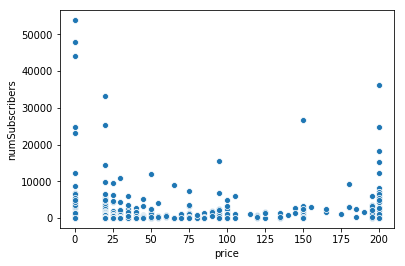

In [6]:
data = df[['price','numSubscribers','numPublishedLectures','contentInfo','instructionalLevel']]
#tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="price", y="numSubscribers", data=data)

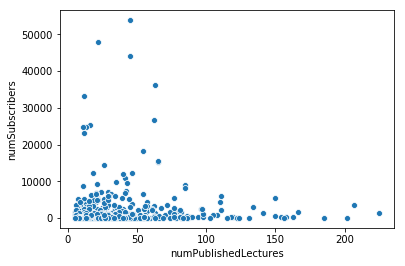

In [26]:
bx = sns.scatterplot(x="numPublishedLectures", y="numSubscribers", data=data)

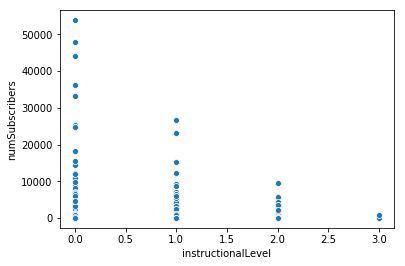

In [7]:
cx = sns.scatterplot(x="instructionalLevel", y="numSubscribers", data=data)

In [29]:
# loading libraries
import numpy as np
from sklearn.model_selection import train_test_split

# create design matrix X and target vector y
X = np.array(data.iloc[:, 0:2]) 	# end index is exclusive
y = np.array(data['instructionalLevel']) 	# another way of indexing a pandas df
print(type(y))
print(isinstance(y,object))
y=y.astype('int')

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<class 'numpy.ndarray'>
True


In [30]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test, pred))

0.5628140703517588
